In [2]:
# Let's start by retrieving some Magic card images using the Scryfall API
# https://scryfall.com/docs/api
# We'll be using the Scryfall python library
# https://github.com/NandaScott/Scrython

In [25]:
import requests
from requests.exceptions import TooManyRedirects, ReadTimeout, ConnectionError
import json
import pprint
import time
import shutil
import os
import os.path
import glob
import csv
from PIL import Image
import random
import numpy as np
import errno
import mxnet as mx
import csv
import matplotlib.pyplot as plt

URL='https://api.scryfall.com'
OUTDIR='/Users/agussman/Documents/DeepLens/deeplens-magiccards/data'


In [89]:
r = requests.get('https://api.scryfall.com/cards/search?order=set&q=e:dom')
# TODO: Support Scryfall pagination: https://scryfall.com/docs/api/lists

In [90]:
results = r.json()['data']
for result in results[:1000]:
    #card = result
    #if 'all_parts' in result
    #print(result['image_uris']['png'])
    time.sleep(0.25)
    image_url = result['image_uris']['png']
    filename = "{}_{num:03d}.png".format(result['set'], num=int(result['collector_number']))
    filename = os.path.join(OUTDIR, result['set'], filename)
    print(filename)
    print("{} -> {}".format(image_url, filename))
    
    r = requests.get(image_url, stream=True)
    
    with open(filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)
    
    '''
    if r.status_code == 200:
        with open(os.path.join(OUTDIR, result['set'], filename), 'wb') as out_file:
            shutil.copyfileobj(response.raw(), out_file)
    else:
        print("Nope. {}".format(response.status_code))
    '''
    
    
#pprint.pprint(results[0:2])

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_001.png
https://img.scryfall.com/cards/png/en/dom/1.png?1524789999 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_001.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_002.png
https://img.scryfall.com/cards/png/en/dom/2.png?1525862131 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_002.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_003.png
https://img.scryfall.com/cards/png/en/dom/3.png?1525862133 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_003.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_004.png
https://img.scryfall.com/cards/png/en/dom/4.png?1524790027 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_004.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_005.png
https://img.scryfall.com/cards/png/en/dom/5.png?1528770903 -> /Users

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_040.png
https://img.scryfall.com/cards/png/en/dom/40.png?1524790396 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_040.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_041.png
https://img.scryfall.com/cards/png/en/dom/41.png?1524790406 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_041.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_042.png
https://img.scryfall.com/cards/png/en/dom/42.png?1524790414 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_042.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_043.png
https://img.scryfall.com/cards/png/en/dom/43.png?1524790424 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_043.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_044.png
https://img.scryfall.com/cards/png/en/dom/44.png?1524790433 -> /

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_079.png
https://img.scryfall.com/cards/png/en/dom/79.png?1524790762 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_079.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_080.png
https://img.scryfall.com/cards/png/en/dom/80.png?1524790770 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_080.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_081.png
https://img.scryfall.com/cards/png/en/dom/81.png?1524790780 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_081.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_082.png
https://img.scryfall.com/cards/png/en/dom/82.png?1524790788 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_082.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_083.png
https://img.scryfall.com/cards/png/en/dom/83.png?1524790796 -> /

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_118.png
https://img.scryfall.com/cards/png/en/dom/118.png?1524791156 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_118.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_119.png
https://img.scryfall.com/cards/png/en/dom/119.png?1525864604 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_119.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_120.png
https://img.scryfall.com/cards/png/en/dom/120.png?1524791173 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_120.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_121.png
https://img.scryfall.com/cards/png/en/dom/121.png?1524791187 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_121.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_122.png
https://img.scryfall.com/cards/png/en/dom/122.png?1524791196

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_156.png
https://img.scryfall.com/cards/png/en/dom/156.png?1524791556 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_156.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_157.png
https://img.scryfall.com/cards/png/en/dom/157.png?1524791565 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_157.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_158.png
https://img.scryfall.com/cards/png/en/dom/158.png?1524791574 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_158.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_159.png
https://img.scryfall.com/cards/png/en/dom/159.png?1525862754 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_159.png
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/dom/dom_160.png
https://img.scryfall.com/cards/png/en/dom/160.png?1524791593

In [73]:
# Next let's download some pictures of tables
# TODO: Don't download HTML as a JPG
table_list_url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03201035'
r = requests.get(table_list_url)

file_urls = r.text.splitlines()

In [87]:
for num, table_url in enumerate(file_urls[100:]):
    print(num, table_url)
    time.sleep(0.25)
    filename = "{num:003d}_{original}".format(num=num, original=os.path.basename(table_url))
    filename = os.path.join(OUTDIR, 'tables', filename)
    print(filename)
    print("{} -> {}".format(table_url, filename))
    
    try:
        r = requests.get(table_url, stream=True, timeout=1)
        if r.status_code == 200:
            with open(filename, 'wb') as fd:
                for chunk in r.iter_content(chunk_size=128):
                    fd.write(chunk)
        else:
            print("SKIP: Problem downloading: {}".format(r.status_code))
    except TooManyRedirects:
        print("SKIP: TooManyRedirects")
    except ReadTimeout:
        print("SKIP: ReadTimeout")
    except ConnectionError:
        print("SKIP: ConnectionError")
    


0 http://farm2.static.flickr.com/1395/1474970283_e5a687c70c.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/000_1474970283_e5a687c70c.jpg
http://farm2.static.flickr.com/1395/1474970283_e5a687c70c.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/000_1474970283_e5a687c70c.jpg
1 http://peoplesfurniture.net/images_products/6228_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/001_6228_small.jpg
http://peoplesfurniture.net/images_products/6228_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/001_6228_small.jpg
SKIP: ReadTimeout
2 http://farm1.static.flickr.com/109/277350299_351613348e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/002_277350299_351613348e.jpg
http://farm1.static.flickr.com/109/277350299_351613348e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/002_277350299_351613348e.jpg
3 http://www.gowfb.com/images/imagecache/462-Bo

25 http://farm2.static.flickr.com/1106/1093235054_e664bec93e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/025_1093235054_e664bec93e.jpg
http://farm2.static.flickr.com/1106/1093235054_e664bec93e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/025_1093235054_e664bec93e.jpg
26 http://z.about.com/d/collectibles/1/5/5/_/wilmes10.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/026_wilmes10.jpg
http://z.about.com/d/collectibles/1/5/5/_/wilmes10.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/026_wilmes10.jpg
SKIP: ConnectionError
27 http://peoplesfurniture.net/images_products/4450_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/027_4450_small.jpg
http://peoplesfurniture.net/images_products/4450_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/027_4450_small.jpg
SKIP: ReadTimeout
28 http://bp1.blogger.com/_pU3onm4o7kw/RyfXslOSQ1I/AAAAA

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/049_311957682_9375af06b8.jpg
http://static.flickr.com/101/311957682_9375af06b8.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/049_311957682_9375af06b8.jpg
50 http://farm2.static.flickr.com/1202/1107251587_8cf268f60d.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/050_1107251587_8cf268f60d.jpg
http://farm2.static.flickr.com/1202/1107251587_8cf268f60d.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/050_1107251587_8cf268f60d.jpg
51 http://www.shrivenham.com/Images/Dining.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/051_Dining.jpg
http://www.shrivenham.com/Images/Dining.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/051_Dining.jpg
52 http://www.gowfb.ca/images/imagecache/basra.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/052_basra.jpg
http://www.gowfb.ca/images/imagecache

75 http://www.staxchairs.com.au/productimg/Redang_Dining_ChairsMain1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/075_Redang_Dining_ChairsMain1.jpg
http://www.staxchairs.com.au/productimg/Redang_Dining_ChairsMain1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/075_Redang_Dining_ChairsMain1.jpg
SKIP: Problem downloading: 404
76 http://www.peoplesfurniture.net/images_products/5642_big.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/076_5642_big.jpg
http://www.peoplesfurniture.net/images_products/5642_big.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/076_5642_big.jpg
SKIP: ReadTimeout
77 http://www.gowfb.com/images/imagecache/5%20PC%20Round%20Dining%20Table%20Set%20-%20Walnut%20Finish.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/077_5%20PC%20Round%20Dining%20Table%20Set%20-%20Walnut%20Finish.jpg
http://www.gowfb.com/images/imagecache/5%20PC%20Round%20Dining%20T

99 http://farm1.static.flickr.com/67/217786870_d416932c49.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/099_217786870_d416932c49.jpg
http://farm1.static.flickr.com/67/217786870_d416932c49.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/099_217786870_d416932c49.jpg
100 http://www.ambfurniture.com/catalog/image.php?type=P&amp;id=18704
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/100_image.php?type=P&amp;id=18704
http://www.ambfurniture.com/catalog/image.php?type=P&amp;id=18704 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/100_image.php?type=P&amp;id=18704
SKIP: Problem downloading: 404
101 http://farm1.static.flickr.com/76/187452261_fadd6bfdc8.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/101_187452261_fadd6bfdc8.jpg
http://farm1.static.flickr.com/76/187452261_fadd6bfdc8.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/101_187452261_fadd6bfdc8

SKIP: ReadTimeout
124 http://farm1.static.flickr.com/2/1697203_978fa4ae55.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/124_1697203_978fa4ae55.jpg
http://farm1.static.flickr.com/2/1697203_978fa4ae55.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/124_1697203_978fa4ae55.jpg
125 http://farm3.static.flickr.com/2351/2148232225_a6dffa3821.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/125_2148232225_a6dffa3821.jpg
http://farm3.static.flickr.com/2351/2148232225_a6dffa3821.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/125_2148232225_a6dffa3821.jpg
126 http://farm3.static.flickr.com/2345/2103956653_dbcc7ac9e0.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/126_2103956653_dbcc7ac9e0.jpg
http://farm3.static.flickr.com/2345/2103956653_dbcc7ac9e0.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/126_2103956653_dbcc7ac9e0.jpg
127 http://farm1.static.f

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/148_FurnitureAmericaHome1.jpg
http://www.furnitureamerica.com/images/pictures/FurnitureAmericaHome1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/148_FurnitureAmericaHome1.jpg
SKIP: ConnectionError
149 http://farm4.static.flickr.com/3241/2761951934_38586a60cb.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/149_2761951934_38586a60cb.jpg
http://farm4.static.flickr.com/3241/2761951934_38586a60cb.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/149_2761951934_38586a60cb.jpg
150 http://69.60.255.163/~htdocs/manimages/828/images/124521DiningRoom1large_L.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/150_124521DiningRoom1large_L.jpg
http://69.60.255.163/~htdocs/manimages/828/images/124521DiningRoom1large_L.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/150_124521DiningRoom1large_L.jpg
SKIP: ConnectionE

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/173_2049539613_09cc137556.jpg
http://static.flickr.com/2261/2049539613_09cc137556.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/173_2049539613_09cc137556.jpg
174 http://farm1.static.flickr.com/36/79873236_3c52851db1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/174_79873236_3c52851db1.jpg
http://farm1.static.flickr.com/36/79873236_3c52851db1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/174_79873236_3c52851db1.jpg
175 http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/3812_350.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/175_3812_350.jpg
http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/3812_350.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/175_3812_350.jpg
SKIP: Problem downloading: 404
176 http://farm3.static.flickr.com/2319/2259994233_654253fb6d.jpg
/Use

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/198_wigeon_hall_dining_s.jpg
http://www.modishdecor.com/images/ash_furniture/Dining%20Room/Traditional/wigeon_hall_dining_s.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/198_wigeon_hall_dining_s.jpg
SKIP: ReadTimeout
199 http://farm1.static.flickr.com/41/125687414_dc41f775c0.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/199_125687414_dc41f775c0.jpg
http://farm1.static.flickr.com/41/125687414_dc41f775c0.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/199_125687414_dc41f775c0.jpg
200 http://www.pioneerhandcraft.ca/pinetrestletable.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/200_pinetrestletable.jpg
http://www.pioneerhandcraft.ca/pinetrestletable.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/200_pinetrestletable.jpg
SKIP: Problem downloading: 404
201 http://www.gowfb.ca/images/imagecache/bon

224 http://farm1.static.flickr.com/185/410163063_bcc73ba004.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/224_410163063_bcc73ba004.jpg
http://farm1.static.flickr.com/185/410163063_bcc73ba004.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/224_410163063_bcc73ba004.jpg
225 http://farm1.static.flickr.com/156/421745830_5f173765cb.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/225_421745830_5f173765cb.jpg
http://farm1.static.flickr.com/156/421745830_5f173765cb.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/225_421745830_5f173765cb.jpg
226 http://farm1.static.flickr.com/57/224786422_9daada132a.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/226_224786422_9daada132a.jpg
http://farm1.static.flickr.com/57/224786422_9daada132a.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/226_224786422_9daada132a.jpg
227 http://www.gowfb.com/images/imagecache/Li

249 http://www.dining-room-sets.org.uk/nitro-dining-set.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/249_nitro-dining-set.jpg
http://www.dining-room-sets.org.uk/nitro-dining-set.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/249_nitro-dining-set.jpg
SKIP: ConnectionError
250 http://farm2.static.flickr.com/1403/1258371616_fe756c5aca.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/250_1258371616_fe756c5aca.jpg
http://farm2.static.flickr.com/1403/1258371616_fe756c5aca.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/250_1258371616_fe756c5aca.jpg
251 http://farm2.static.flickr.com/1413/1034106211_fe85b8a679.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/251_1034106211_fe85b8a679.jpg
http://farm2.static.flickr.com/1413/1034106211_fe85b8a679.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/251_1034106211_fe85b8a679.jpg
252 http://www.gowfb.com/

274 http://farm1.static.flickr.com/75/174663547_b42ecc4a6c.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/274_174663547_b42ecc4a6c.jpg
http://farm1.static.flickr.com/75/174663547_b42ecc4a6c.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/274_174663547_b42ecc4a6c.jpg
275 http://www.beiters.com/images/dining2_sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/275_dining2_sm.jpg
http://www.beiters.com/images/dining2_sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/275_dining2_sm.jpg
SKIP: Problem downloading: 404
276 http://g-ec2.images-amazon.com/images/I/51IgB-Em6rL._classic-furniture_.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/276_51IgB-Em6rL._classic-furniture_.jpg
http://g-ec2.images-amazon.com/images/I/51IgB-Em6rL._classic-furniture_.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/276_51IgB-Em6rL._classic-furniture_.jpg
SKIP: Prob

SKIP: Problem downloading: 404
298 http://farm4.static.flickr.com/3060/2313442764_f7b8ccecb4.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/298_2313442764_f7b8ccecb4.jpg
http://farm4.static.flickr.com/3060/2313442764_f7b8ccecb4.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/298_2313442764_f7b8ccecb4.jpg
299 http://www.retrowow.co.uk/retro_style/homes/g-plan3.gif
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/299_g-plan3.gif
http://www.retrowow.co.uk/retro_style/homes/g-plan3.gif -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/299_g-plan3.gif
300 http://static.flickr.com/2416/2204505970_69fbb3540e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/300_2204505970_69fbb3540e.jpg
http://static.flickr.com/2416/2204505970_69fbb3540e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/300_2204505970_69fbb3540e.jpg
301 http://farm1.static.flickr.com/221/5215977

324 http://peoplesfurniture.net/images_products/5645_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/324_5645_small.jpg
http://peoplesfurniture.net/images_products/5645_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/324_5645_small.jpg
SKIP: ReadTimeout
325 http://www.contemporary-furniture-store.com/images/dining-room.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/325_dining-room.jpg
http://www.contemporary-furniture-store.com/images/dining-room.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/325_dining-room.jpg
SKIP: ReadTimeout
326 http://farm3.static.flickr.com/2160/2257705227_04d81c6279.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/326_2257705227_04d81c6279.jpg
http://farm3.static.flickr.com/2160/2257705227_04d81c6279.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/326_2257705227_04d81c6279.jpg
327 http://farm1.static.fli

348 http://farm4.static.flickr.com/3016/2638098376_3868283fe9.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/348_2638098376_3868283fe9.jpg
http://farm4.static.flickr.com/3016/2638098376_3868283fe9.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/348_2638098376_3868283fe9.jpg
349 http://farm2.static.flickr.com/1121/1096796398_dff384ac6b.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/349_1096796398_dff384ac6b.jpg
http://farm2.static.flickr.com/1121/1096796398_dff384ac6b.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/349_1096796398_dff384ac6b.jpg
350 http://farm1.static.flickr.com/24/103427075_4a51f6ceea.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/350_103427075_4a51f6ceea.jpg
http://farm1.static.flickr.com/24/103427075_4a51f6ceea.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/350_103427075_4a51f6ceea.jpg
351 http://farm3.static.flickr.co

SKIP: Problem downloading: 404
373 http://www.bransonfurniture.com/images/cabins/cabins/dining_room.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/373_dining_room.jpg
http://www.bransonfurniture.com/images/cabins/cabins/dining_room.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/373_dining_room.jpg
374 http://www.redleafads.com/photos/class/thumb190/1215879335ghj.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/374_1215879335ghj.jpg
http://www.redleafads.com/photos/class/thumb190/1215879335ghj.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/374_1215879335ghj.jpg
SKIP: Problem downloading: 404
375 http://farm3.static.flickr.com/2407/1763113781_6200cd4a07.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/375_1763113781_6200cd4a07.jpg
http://farm3.static.flickr.com/2407/1763113781_6200cd4a07.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/375_176

398 http://www.peoplesfurniture.net/scart/public/database/product/images_products/5661_big.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/398_5661_big.jpg
http://www.peoplesfurniture.net/scart/public/database/product/images_products/5661_big.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/398_5661_big.jpg
SKIP: ReadTimeout
399 http://bp0.blogger.com/_Ssud8db3HLY/RnMLyOIP4sI/AAAAAAAAAdo/8ZedSKcz9hQ/s400/bm+09.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/399_bm+09.jpg
http://bp0.blogger.com/_Ssud8db3HLY/RnMLyOIP4sI/AAAAAAAAAdo/8ZedSKcz9hQ/s400/bm+09.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/399_bm+09.jpg
400 http://www.indiamart.com/bcexports/pcat-gifs/products-small/2dining-room-furniture.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/400_2dining-room-furniture.jpg
http://www.indiamart.com/bcexports/pcat-gifs/products-small/2dining-room-furniture.jpg -> /Us

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/422_449648891_7623f3664e.jpg?v=0
http://farm1.static.flickr.com/186/449648891_7623f3664e.jpg?v=0 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/422_449648891_7623f3664e.jpg?v=0
423 http://www.metalworksinc.com/PHOTOS/furniture/diningroom_table.gif
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/423_diningroom_table.gif
http://www.metalworksinc.com/PHOTOS/furniture/diningroom_table.gif -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/423_diningroom_table.gif
424 http://farm2.static.flickr.com/1037/1479589030_12fdd7afa1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/424_1479589030_12fdd7afa1.jpg
http://farm2.static.flickr.com/1037/1479589030_12fdd7afa1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/424_1479589030_12fdd7afa1.jpg
425 http://farm1.static.flickr.com/229/453265818_ee29bd5c91.jpg
/Users/agussman/Doc

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/447_dining-room-furniture.jpg
http://www.indiamart.com/renaissanceexports/pcat-gifs/products-small/dining-room-furniture.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/447_dining-room-furniture.jpg
SKIP: Problem downloading: 404
448 http://www.mattressmack.com/macks_weblog/images/2007/12/27/435135745.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/448_435135745.jpg
http://www.mattressmack.com/macks_weblog/images/2007/12/27/435135745.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/448_435135745.jpg
449 http://www.askwatauga.com/Businesses/wolfCreek/images/newImages/furnTableDiningRoom.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/449_furnTableDiningRoom.jpg
http://www.askwatauga.com/Businesses/wolfCreek/images/newImages/furnTableDiningRoom.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/449_furnT

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/471_304715195_05cef89a00.jpg
http://farm1.static.flickr.com/103/304715195_05cef89a00.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/471_304715195_05cef89a00.jpg
472 http://www.guadalajarafurniture.com/diningrooms/table1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/472_table1.jpg
http://www.guadalajarafurniture.com/diningrooms/table1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/472_table1.jpg
SKIP: ReadTimeout
473 http://members.iinet.com.au/~coakeley/proform/table.gif
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/473_table.gif
http://members.iinet.com.au/~coakeley/proform/table.gif -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/473_table.gif
SKIP: Problem downloading: 404
474 http://www.homelement.com/images/md_1371-36-TABLE.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/4

494 http://www.familyoutfitters.org/fots_files/resized/Table_Front_Back.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/494_Table_Front_Back.jpg
http://www.familyoutfitters.org/fots_files/resized/Table_Front_Back.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/494_Table_Front_Back.jpg
SKIP: ReadTimeout
495 http://peoplesfurniture.net/images_products/6513_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/495_6513_small.jpg
http://peoplesfurniture.net/images_products/6513_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/495_6513_small.jpg
SKIP: ReadTimeout
496 http://farm3.static.flickr.com/2353/2173865355_8521bb27ec.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/496_2173865355_8521bb27ec.jpg
http://farm3.static.flickr.com/2353/2173865355_8521bb27ec.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/496_2173865355_8521bb27ec.jpg
497 htt

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/518_bonaparte-dining-room-rectangular-glass-table.JPG
http://www.gowfb.com/images/prod_alts/thumbs/bonaparte-dining-room-rectangular-glass-table.JPG -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/518_bonaparte-dining-room-rectangular-glass-table.JPG
SKIP: Problem downloading: 404
519 http://farm3.static.flickr.com/2137/2359271050_77a2284c4c.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/519_2359271050_77a2284c4c.jpg
http://farm3.static.flickr.com/2137/2359271050_77a2284c4c.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/519_2359271050_77a2284c4c.jpg
520 http://www.greatpricedfurniture.com/images/website/products/51237450/1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/520_1.jpg
http://www.greatpricedfurniture.com/images/website/products/51237450/1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/520

SKIP: ReadTimeout
543 http://www.pinetum.co.uk/NewPinetumProducts/QUERCUSNewOakDining4_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/543_QUERCUSNewOakDining4_small.jpg
http://www.pinetum.co.uk/NewPinetumProducts/QUERCUSNewOakDining4_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/543_QUERCUSNewOakDining4_small.jpg
SKIP: ConnectionError
544 http://www.villaaquilea.com/images/DiningRoom.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/544_DiningRoom.jpg
http://www.villaaquilea.com/images/DiningRoom.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/544_DiningRoom.jpg
SKIP: Problem downloading: 404
545 http://www.ourvictorianhouse.com/Dining%20Room/Dining%20Room%20Complete/dining%20room%20table.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/545_dining%20room%20table.jpg
http://www.ourvictorianhouse.com/Dining%20Room/Dining%20Room%20Complete/dining%20room%20ta

SKIP: ConnectionError
568 http://farm1.static.flickr.com/174/410162816_b9395d7733.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/568_410162816_b9395d7733.jpg
http://farm1.static.flickr.com/174/410162816_b9395d7733.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/568_410162816_b9395d7733.jpg
569 http://farm1.static.flickr.com/108/275356697_f61bd81d0b.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/569_275356697_f61bd81d0b.jpg
http://farm1.static.flickr.com/108/275356697_f61bd81d0b.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/569_275356697_f61bd81d0b.jpg
570 http://farm3.static.flickr.com/2314/2377810388_15df426376.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/570_2377810388_15df426376.jpg
http://farm3.static.flickr.com/2314/2377810388_15df426376.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/570_2377810388_15df426376.jpg
571 http://farm

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/592_dr.jpg
http://www.dominiqueshouse.com/images/dr.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/592_dr.jpg
SKIP: Problem downloading: 404
593 http://64.79.205.169/images/C100331-100332-Set.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/593_C100331-100332-Set.jpg
http://64.79.205.169/images/C100331-100332-Set.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/593_C100331-100332-Set.jpg
SKIP: ConnectionError
594 http://farm4.static.flickr.com/3121/2630777783_bfc736ab2e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/594_2630777783_bfc736ab2e.jpg
http://farm4.static.flickr.com/3121/2630777783_bfc736ab2e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/594_2630777783_bfc736ab2e.jpg
595 http://farm1.static.flickr.com/105/295319768_3463dfd65b.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/da

618 http://static.flickr.com/2286/2059919849_d60cc492f3.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/618_2059919849_d60cc492f3.jpg
http://static.flickr.com/2286/2059919849_d60cc492f3.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/618_2059919849_d60cc492f3.jpg
619 http://www.camposfurniture.com/images/dnrms/dining_2a.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/619_dining_2a.jpg
http://www.camposfurniture.com/images/dnrms/dining_2a.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/619_dining_2a.jpg
SKIP: Problem downloading: 404
620 http://farm4.static.flickr.com/3262/2351835900_0dafc2dd3e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/620_2351835900_0dafc2dd3e.jpg
http://farm4.static.flickr.com/3262/2351835900_0dafc2dd3e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/620_2351835900_0dafc2dd3e.jpg
621 http://farm3.static.flickr.com/202

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/643_295335251_007ad273df.jpg
http://farm1.static.flickr.com/117/295335251_007ad273df.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/643_295335251_007ad273df.jpg
644 http://antiquepurveyor.com/Antique_Dining_Room_216_0049_tn.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/644_Antique_Dining_Room_216_0049_tn.jpg
http://antiquepurveyor.com/Antique_Dining_Room_216_0049_tn.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/644_Antique_Dining_Room_216_0049_tn.jpg
645 http://www.furniturestoreblog.com/images/Millennum%20Dining%20Table%20by%20Ashley%20Furniture.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/645_Millennum%20Dining%20Table%20by%20Ashley%20Furniture.jpg
http://www.furniturestoreblog.com/images/Millennum%20Dining%20Table%20by%20Ashley%20Furniture.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/

668 http://farm1.static.flickr.com/48/126938758_f4df0568a1.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/668_126938758_f4df0568a1.jpg
http://farm1.static.flickr.com/48/126938758_f4df0568a1.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/668_126938758_f4df0568a1.jpg
669 http://farm1.static.flickr.com/1/126167442_59703789a7.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/669_126167442_59703789a7.jpg
http://farm1.static.flickr.com/1/126167442_59703789a7.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/669_126167442_59703789a7.jpg
670 http://farm4.static.flickr.com/3260/2343712658_8385d9f730.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/670_2343712658_8385d9f730.jpg
http://farm4.static.flickr.com/3260/2343712658_8385d9f730.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/670_2343712658_8385d9f730.jpg
671 http://farm2.static.flickr.com/1010/763

SKIP: Problem downloading: 404
693 http://img.photobucket.com/albums/v484/huisman98/DSC03923.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/693_DSC03923.jpg
http://img.photobucket.com/albums/v484/huisman98/DSC03923.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/693_DSC03923.jpg
694 http://www.comfortinstylefurniture.com/diningroom/new_collection/2078dt_2078dc_sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/694_2078dt_2078dc_sm.jpg
http://www.comfortinstylefurniture.com/diningroom/new_collection/2078dt_2078dc_sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/694_2078dt_2078dc_sm.jpg
SKIP: ConnectionError
695 http://www.the-lift.com/images/Tomahawk%20House/livingroom2sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/695_livingroom2sm.jpg
http://www.the-lift.com/images/Tomahawk%20House/livingroom2sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/da

718 http://farm3.static.flickr.com/2344/2273005164_dd2e6136be.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/718_2273005164_dd2e6136be.jpg
http://farm3.static.flickr.com/2344/2273005164_dd2e6136be.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/718_2273005164_dd2e6136be.jpg
719 http://www.dinette.com/content/store/products/37/2/32.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/719_32.jpg
http://www.dinette.com/content/store/products/37/2/32.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/719_32.jpg
SKIP: Problem downloading: 404
720 http://farm4.static.flickr.com/3156/2674343119_3d1359f778.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/720_2674343119_3d1359f778.jpg
http://farm4.static.flickr.com/3156/2674343119_3d1359f778.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/720_2674343119_3d1359f778.jpg
721 http://bp2.blogger.com/_N2MVgW9Vxwc/

743 http://farm4.static.flickr.com/3212/2449518156_7a4b54e332.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/743_2449518156_7a4b54e332.jpg
http://farm4.static.flickr.com/3212/2449518156_7a4b54e332.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/743_2449518156_7a4b54e332.jpg
744 http://www.domesticsale.com/mainclass/photos/thumb190/1193786006jim.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/744_1193786006jim.jpg
http://www.domesticsale.com/mainclass/photos/thumb190/1193786006jim.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/744_1193786006jim.jpg
SKIP: Problem downloading: 404
745 http://www.losangelesfurniture.com/images/fd_bonaparte_418_dining_room_leg_table_2_lg.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/745_fd_bonaparte_418_dining_room_leg_table_2_lg.jpg
http://www.losangelesfurniture.com/images/fd_bonaparte_418_dining_room_leg_table_2_lg.jpg -> /Users/ag

SKIP: ReadTimeout
768 http://farm1.static.flickr.com/227/510918881_8d30a6c2a8.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/768_510918881_8d30a6c2a8.jpg
http://farm1.static.flickr.com/227/510918881_8d30a6c2a8.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/768_510918881_8d30a6c2a8.jpg
769 http://www.gowfb.com/catalog/images/FDPictures0705/437-Scandia-dining-room-furniture-pedestal-table.gif
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/769_437-Scandia-dining-room-furniture-pedestal-table.gif
http://www.gowfb.com/catalog/images/FDPictures0705/437-Scandia-dining-room-furniture-pedestal-table.gif -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/769_437-Scandia-dining-room-furniture-pedestal-table.gif
SKIP: Problem downloading: 404
770 http://farm2.static.flickr.com/1313/1051035685_a509e8e98f.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/770_1051035685_a509e8e98f.jpg
http:/

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/793_diningroom_tables_p1_12.jpg
http://www.bhgfurniture.com/images/diningroom_tables_p1_12.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/793_diningroom_tables_p1_12.jpg
SKIP: ConnectionError
794 http://www.arealfindantiques.com/pictures4.07/RetroDiningRoom.JPG
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/794_RetroDiningRoom.JPG
http://www.arealfindantiques.com/pictures4.07/RetroDiningRoom.JPG -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/794_RetroDiningRoom.JPG
795 http://farm3.static.flickr.com/2216/2238316788_004dce6890.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/795_2238316788_004dce6890.jpg
http://farm3.static.flickr.com/2216/2238316788_004dce6890.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/795_2238316788_004dce6890.jpg
796 http://farm3.static.flickr.com/2389/2179493176_aed7578e2e.jpg
/U

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/818_%7b0CA4256B-0DBE-4AFF-8F99-5AA4A06E5BDC%7d.jpg
http://www.feldmanfurniture.com/pmidimages/%7b0CA4256B-0DBE-4AFF-8F99-5AA4A06E5BDC%7d.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/818_%7b0CA4256B-0DBE-4AFF-8F99-5AA4A06E5BDC%7d.jpg
SKIP: Problem downloading: 404
819 http://farm3.static.flickr.com/2363/2005080708_438562b377.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/819_2005080708_438562b377.jpg
http://farm3.static.flickr.com/2363/2005080708_438562b377.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/819_2005080708_438562b377.jpg
820 http://farm3.static.flickr.com/2090/2048243130_00a4d7aebb.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/820_2048243130_00a4d7aebb.jpg
http://farm3.static.flickr.com/2090/2048243130_00a4d7aebb.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/820_2048243130_00a4d

SKIP: ConnectionError
843 http://www.furnitureontheweb.com/images/Furniture/hm649.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/843_hm649.jpg
http://www.furnitureontheweb.com/images/Furniture/hm649.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/843_hm649.jpg
SKIP: ConnectionError
844 http://farm4.static.flickr.com/3281/2474591681_3e5cbb8417.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/844_2474591681_3e5cbb8417.jpg
http://farm4.static.flickr.com/3281/2474591681_3e5cbb8417.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/844_2474591681_3e5cbb8417.jpg
845 http://farm4.static.flickr.com/3123/2360376551_2c3f36779d.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/845_2360376551_2c3f36779d.jpg
http://farm4.static.flickr.com/3123/2360376551_2c3f36779d.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/845_2360376551_2c3f36779d.jpg
846 http://farm2.

869 http://farm4.static.flickr.com/3036/2610618077_99fc632588.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/869_2610618077_99fc632588.jpg
http://farm4.static.flickr.com/3036/2610618077_99fc632588.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/869_2610618077_99fc632588.jpg
870 http://furniturefromhome.com/images/store/estates_dining_room_2/760x600/image.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/870_image.jpg
http://furniturefromhome.com/images/store/estates_dining_room_2/760x600/image.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/870_image.jpg
871 http://farm3.static.flickr.com/2352/2443807152_471d42cf07.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/871_2443807152_471d42cf07.jpg
http://farm3.static.flickr.com/2352/2443807152_471d42cf07.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/871_2443807152_471d42cf07.jpg
872 http://farm3.

895 http://farm1.static.flickr.com/89/237910540_fb0b37861a.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/895_237910540_fb0b37861a.jpg
http://farm1.static.flickr.com/89/237910540_fb0b37861a.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/895_237910540_fb0b37861a.jpg
896 http://farm1.static.flickr.com/115/314416483_83a84b933c.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/896_314416483_83a84b933c.jpg
http://farm1.static.flickr.com/115/314416483_83a84b933c.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/896_314416483_83a84b933c.jpg
897 http://farm2.static.flickr.com/1001/641600765_5f00454956.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/897_641600765_5f00454956.jpg
http://farm2.static.flickr.com/1001/641600765_5f00454956.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/897_641600765_5f00454956.jpg
898 http://www.eandsgott.com/images/dining_

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/920_1045070771_39b5439845.jpg
http://farm2.static.flickr.com/1042/1045070771_39b5439845.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/920_1045070771_39b5439845.jpg
921 http://img.photobucket.com/albums/v484/huisman98/DSC03922.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/921_DSC03922.jpg
http://img.photobucket.com/albums/v484/huisman98/DSC03922.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/921_DSC03922.jpg
922 http://www.silveradohomedesign.com/Portals/767/diningroom.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/922_diningroom.jpg
http://www.silveradohomedesign.com/Portals/767/diningroom.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/922_diningroom.jpg
SKIP: ConnectionError
923 http://www.familyestatesintuscany.com/wp-content/uploads/2006/03/diningroom.jpg
/Users/agussman/Documents/DeepLen

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/945_cafe-25set-600.jpg
http://www.ssb7.net/users/45089/cafe-25set-600.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/945_cafe-25set-600.jpg
SKIP: ConnectionError
946 http://www.thefurniture.com/store/Images/Pulaski/Costa%20Dorada/687240-60-61-300.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/946_687240-60-61-300.jpg
http://www.thefurniture.com/store/Images/Pulaski/Costa%20Dorada/687240-60-61-300.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/946_687240-60-61-300.jpg
947 http://www.peoplesfurniture.net/images_products/5629_big.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/947_5629_big.jpg
http://www.peoplesfurniture.net/images_products/5629_big.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/947_5629_big.jpg
SKIP: ReadTimeout
948 http://www.francecruises.com/BOATS/Prosperite/Dining.jpg
/Users/

969 http://www.crosskeysantiques.com/images/Thumbnail%20List/Dining_Room_photo_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/969_Dining_Room_photo_small.jpg
http://www.crosskeysantiques.com/images/Thumbnail%20List/Dining_Room_photo_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/969_Dining_Room_photo_small.jpg
970 http://www.kaylormtncabins.com/cabin_rentals/heavenly_hideaway/dining-room-sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/970_dining-room-sm.jpg
http://www.kaylormtncabins.com/cabin_rentals/heavenly_hideaway/dining-room-sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/970_dining-room-sm.jpg
SKIP: Problem downloading: 404
971 http://www.thailandtradenet.com/photos/catalog/dining-room/executive-dining-room.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/971_executive-dining-room.jpg
http://www.thailandtradenet.com/photos/catalog/dining-roo

993 http://kat.prawl.net/wp-content/uploads/2007/07/table.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/993_table.jpg
http://kat.prawl.net/wp-content/uploads/2007/07/table.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/993_table.jpg
SKIP: ReadTimeout
994 http://www.chrissharpcabinets.co.uk/content/diningroomcut2pic.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/994_diningroomcut2pic.jpg
http://www.chrissharpcabinets.co.uk/content/diningroomcut2pic.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/994_diningroomcut2pic.jpg
995 http://image.bizrate.com/resize?sq=160&uid=652903795&mid=34879
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/995_resize?sq=160&uid=652903795&mid=34879
http://image.bizrate.com/resize?sq=160&uid=652903795&mid=34879 -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/995_resize?sq=160&uid=652903795&mid=34879
996 http://www.hometo

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1017_5200_350.jpg
http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/5200_350.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1017_5200_350.jpg
SKIP: Problem downloading: 404
1018 http://www.losangelesfurniture.com/images/uni_avanti_dining_room_1_sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1018_uni_avanti_dining_room_1_sm.jpg
http://www.losangelesfurniture.com/images/uni_avanti_dining_room_1_sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1018_uni_avanti_dining_room_1_sm.jpg
SKIP: Problem downloading: 404
1019 http://www.tietcustomcabinets.com/img/gallery/table2-sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1019_table2-sm.jpg
http://www.tietcustomcabinets.com/img/gallery/table2-sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1019_table2-sm.jpg
SKIP: Problem download

SKIP: Problem downloading: 410
1041 http://www.designinwoodinc.com/images/brandt_diningtable_20.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1041_brandt_diningtable_20.jpg
http://www.designinwoodinc.com/images/brandt_diningtable_20.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1041_brandt_diningtable_20.jpg
1042 http://a248.e.akamai.net/f/248/38434/6h/www.alsto.com/images/en_US/local/products/248x/dining-table-330977.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1042_dining-table-330977.jpg
http://a248.e.akamai.net/f/248/38434/6h/www.alsto.com/images/en_US/local/products/248x/dining-table-330977.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1042_dining-table-330977.jpg
SKIP: Problem downloading: 403
1043 http://farm1.static.flickr.com/254/451486093_57a8e31d37.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1043_451486093_57a8e31d37.jpg
http://farm1.static.fl

1065 http://www.thomasville.com/ProductImages/IrvingPark/DiningRoom/41721_730_350.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1065_41721_730_350.jpg
http://www.thomasville.com/ProductImages/IrvingPark/DiningRoom/41721_730_350.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1065_41721_730_350.jpg
SKIP: Problem downloading: 404
1066 http://www.nwfinewoodworking.com/david_gray/tietn.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1066_tietn.jpg
http://www.nwfinewoodworking.com/david_gray/tietn.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1066_tietn.jpg
SKIP: Problem downloading: 404
1067 http://furniturefromhome.com/images/store/100538-100539/760x600/image.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1067_image.jpg
http://furniturefromhome.com/images/store/100538-100539/760x600/image.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/106

SKIP: Problem downloading: 404
1089 http://www.gowfb.com/images/prod_alts/thumbs/418-Bonaparte-dining-room-pedestal-table-upholstered-chairs.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1089_418-Bonaparte-dining-room-pedestal-table-upholstered-chairs.jpg
http://www.gowfb.com/images/prod_alts/thumbs/418-Bonaparte-dining-room-pedestal-table-upholstered-chairs.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1089_418-Bonaparte-dining-room-pedestal-table-upholstered-chairs.jpg
SKIP: Problem downloading: 404
1090 http://farm4.static.flickr.com/3179/2537469335_b1a3618e34.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1090_2537469335_b1a3618e34.jpg
http://farm4.static.flickr.com/3179/2537469335_b1a3618e34.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1090_2537469335_b1a3618e34.jpg
1091 http://www.furnishingsguide.com/images/Menu/Dining.bmp
/Users/agussman/Documents/DeepLens/deeplens-magiccar

1112 http://pinetummanufacturing.com/NewProducts05Images/MilaneseDiningRoom500.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1112_MilaneseDiningRoom500.jpg
http://pinetummanufacturing.com/NewProducts05Images/MilaneseDiningRoom500.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1112_MilaneseDiningRoom500.jpg
SKIP: ConnectionError
1113 http://www.heplerdesigns.com/images/shirleyjones4.GIF
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1113_shirleyjones4.GIF
http://www.heplerdesigns.com/images/shirleyjones4.GIF -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1113_shirleyjones4.GIF
1114 http://farm3.static.flickr.com/2392/1491017039_ce49638bde.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1114_1491017039_ce49638bde.jpg
http://farm3.static.flickr.com/2392/1491017039_ce49638bde.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1114_1491017039_ce49638bd

SKIP: Problem downloading: 404
1136 http://www.furnitureontheweb.com/images/Furniture/stsk4872tl.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1136_stsk4872tl.jpg
http://www.furnitureontheweb.com/images/Furniture/stsk4872tl.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1136_stsk4872tl.jpg
SKIP: ConnectionError
1137 http://common.csnstores.com/common/products/KLF/KLF1259_l.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1137_KLF1259_l.jpg
http://common.csnstores.com/common/products/KLF/KLF1259_l.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1137_KLF1259_l.jpg
SKIP: Problem downloading: 404
1138 http://www.eco-furniture.com/im/1143/newport-rounddiningtable.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1138_newport-rounddiningtable.jpg
http://www.eco-furniture.com/im/1143/newport-rounddiningtable.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data

SKIP: Problem downloading: 403
1160 http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/3819_350.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1160_3819_350.jpg
http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/3819_350.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1160_3819_350.jpg
SKIP: Problem downloading: 404
1161 http://www.wdass.net/GrlinaBox/graphics/colorphotos/12_1_2004/diningroom.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1161_diningroom.jpg
http://www.wdass.net/GrlinaBox/graphics/colorphotos/12_1_2004/diningroom.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1161_diningroom.jpg
1162 http://www.feldmanfurniture.com/pthumbs/%7b87A4BAFD-F93F-4B05-BAA9-701DA135E80D%7d.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1162_%7b87A4BAFD-F93F-4B05-BAA9-701DA135E80D%7d.jpg
http://www.feldmanfurniture.com/pthumbs/%7b87A4BAFD-F93

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1183_508238854_7cf3e4bf1a.jpg
http://farm1.static.flickr.com/222/508238854_7cf3e4bf1a.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1183_508238854_7cf3e4bf1a.jpg
1184 http://www.feldmanfurniture.com/pthumbs/%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1184_%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg
http://www.feldmanfurniture.com/pthumbs/%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1184_%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg
SKIP: Problem downloading: 404
1185 http://www.dukewood.com/ProductImages/rw2small/imperial-8seater.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1185_imperial-8seater.jpg
http://www.dukewood.com/ProductImages/rw2small/imperial-8seater.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/

1206 http://peoplesfurniture.net/images_products/4446_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1206_4446_small.jpg
http://peoplesfurniture.net/images_products/4446_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1206_4446_small.jpg
SKIP: ReadTimeout
1207 http://static.flickr.com/2021/2198283837_ef8f97b222.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1207_2198283837_ef8f97b222.jpg
http://static.flickr.com/2021/2198283837_ef8f97b222.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1207_2198283837_ef8f97b222.jpg
1208 http://images.lunafurniture.com/DAYD621-35-01-01A.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1208_DAYD621-35-01-01A.jpg
http://images.lunafurniture.com/DAYD621-35-01-01A.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1208_DAYD621-35-01-01A.jpg
1209 http://www.feldmanfurniture.com/pthumbs/%7b024ACF04-B18A-

SKIP: ReadTimeout
1231 http://www.comcore21.com/prodimages-cdls/gf-A1110-xx-CG.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1231_gf-A1110-xx-CG.jpg
http://www.comcore21.com/prodimages-cdls/gf-A1110-xx-CG.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1231_gf-A1110-xx-CG.jpg
SKIP: Problem downloading: 404
1232 http://www.thefurniture.com/store/Images/Pulaski/Victorias%20Manor/661230_261_262_300_301.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1232_661230_261_262_300_301.jpg
http://www.thefurniture.com/store/Images/Pulaski/Victorias%20Manor/661230_261_262_300_301.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1232_661230_261_262_300_301.jpg
1233 http://farm1.static.flickr.com/51/378391502_3eccdf9c05.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1233_378391502_3eccdf9c05.jpg
http://farm1.static.flickr.com/51/378391502_3eccdf9c05.jpg -> /Users/agussman/Document

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1254_diningroom_furniture_matrix.jpg
http://www.casadelsolfurniture.com/images/diningroom/diningroom_furniture_matrix.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1254_diningroom_furniture_matrix.jpg
SKIP: ConnectionError
1255 http://www.bedsandmoreonline.com/images/diningroom2418sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1255_diningroom2418sm.jpg
http://www.bedsandmoreonline.com/images/diningroom2418sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1255_diningroom2418sm.jpg
SKIP: ConnectionError
1256 http://www.greatchandelier.com/GREATCHANDELIERS/images-NEWPS/DININGLG/D493A.JPG
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1256_D493A.JPG
http://www.greatchandelier.com/GREATCHANDELIERS/images-NEWPS/DININGLG/D493A.JPG -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1256_D493A.JPG
1257 http://

SKIP: Problem downloading: 403
1277 http://farm2.static.flickr.com/1331/1440110395_29cb8e7914.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1277_1440110395_29cb8e7914.jpg
http://farm2.static.flickr.com/1331/1440110395_29cb8e7914.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1277_1440110395_29cb8e7914.jpg
1278 http://farm1.static.flickr.com/253/521888579_3298bc1cc2.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1278_521888579_3298bc1cc2.jpg
http://farm1.static.flickr.com/253/521888579_3298bc1cc2.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1278_521888579_3298bc1cc2.jpg
1279 http://www.issm-iseb.org/b2b/pics/Dining_Room_Set.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1279_Dining_Room_Set.jpg
http://www.issm-iseb.org/b2b/pics/Dining_Room_Set.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1279_Dining_Room_Set.jpg
SKIP: ReadTimeout
1

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1301_2272782679_5cac516cb7.jpg
http://farm3.static.flickr.com/2111/2272782679_5cac516cb7.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1301_2272782679_5cac516cb7.jpg
1302 http://www.gowfb.ca/images/imagecache/Nuage-Table-with-Mali-Tan-C.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1302_Nuage-Table-with-Mali-Tan-C.jpg
http://www.gowfb.ca/images/imagecache/Nuage-Table-with-Mali-Tan-C.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1302_Nuage-Table-with-Mali-Tan-C.jpg
SKIP: Problem downloading: 404
1303 http://www.thomasville.com/ProductImages/PalaisJardin/Additions/39321_752_350.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1303_39321_752_350.jpg
http://www.thomasville.com/ProductImages/PalaisJardin/Additions/39321_752_350.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1303_39321_752_350.jpg


SKIP: ReadTimeout
1326 http://farm1.static.flickr.com/18/70184789_48499dfd51.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1326_70184789_48499dfd51.jpg
http://farm1.static.flickr.com/18/70184789_48499dfd51.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1326_70184789_48499dfd51.jpg
1327 http://www.cupboardlove.com/pics/dining/table/farm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1327_farm.jpg
http://www.cupboardlove.com/pics/dining/table/farm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1327_farm.jpg
1328 http://www.dpdoors.com/gifs/dining-room7.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1328_dining-room7.jpg
http://www.dpdoors.com/gifs/dining-room7.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1328_dining-room7.jpg
SKIP: Problem downloading: 404
1329 http://www.adirondackfurniture.com/images/1080sm.jpg
/Users/agussman/Docum

SKIP: ConnectionError
1350 http://www.villaparkhouse.com/images/dining-rm-shad.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1350_dining-rm-shad.jpg
http://www.villaparkhouse.com/images/dining-rm-shad.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1350_dining-rm-shad.jpg
SKIP: ConnectionError
1351 http://www.designat639.com/Photos/mid-century-dining-room.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1351_mid-century-dining-room.jpg
http://www.designat639.com/Photos/mid-century-dining-room.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1351_mid-century-dining-room.jpg
SKIP: ReadTimeout
1352 http://farm4.static.flickr.com/3129/2420077448_9643290489.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1352_2420077448_9643290489.jpg
http://farm4.static.flickr.com/3129/2420077448_9643290489.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1352_24

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1375_ovaltrestle.jpg
http://www.vermontwoods.com/LFC/ovaltrestle.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1375_ovaltrestle.jpg
SKIP: Problem downloading: 404
1376 http://static.flickr.com/1321/1442374371_cdb79eb388.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1376_1442374371_cdb79eb388.jpg
http://static.flickr.com/1321/1442374371_cdb79eb388.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1376_1442374371_cdb79eb388.jpg
1377 http://farm4.static.flickr.com/3176/2625723411_41b0e5d322.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1377_2625723411_41b0e5d322.jpg
http://farm4.static.flickr.com/3176/2625723411_41b0e5d322.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1377_2625723411_41b0e5d322.jpg
1378 http://farm1.static.flickr.com/105/289749820_cabc85d037.jpg
/Users/agussman/Documents/DeepLen

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1398_stsm900t.jpg
http://www.furnitureontheweb.com/images/Furniture/stsm900t.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1398_stsm900t.jpg
SKIP: ConnectionError
1399 http://farm4.static.flickr.com/3105/2560030706_f340f5ec1d.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1399_2560030706_f340f5ec1d.jpg
http://farm4.static.flickr.com/3105/2560030706_f340f5ec1d.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1399_2560030706_f340f5ec1d.jpg
1400 http://www.furnituretrader.com/images/categories/4.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1400_4.jpg
http://www.furnituretrader.com/images/categories/4.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1400_4.jpg
SKIP: Problem downloading: 403
1401 http://www.thomasville.com/ProductImages/ColorCafe/DiningRoom0904/4842_350.jpg
/Users/agussman/Documents

SKIP: Problem downloading: 404
1422 https://www.ambwashington.um.dk/NR/rdonlyres/8168962F-5CCC-4DF6-87AC-820B356932B7/0/diningroom2007.JPG
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1422_diningroom2007.JPG
https://www.ambwashington.um.dk/NR/rdonlyres/8168962F-5CCC-4DF6-87AC-820B356932B7/0/diningroom2007.JPG -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1422_diningroom2007.JPG
SKIP: ConnectionError
1423 http://www.peoplesfurniture.net/images_products/5660_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1423_5660_small.jpg
http://www.peoplesfurniture.net/images_products/5660_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1423_5660_small.jpg
SKIP: ReadTimeout
1424 http://www.modishdecor.com/images/ash_furniture/Dining%20Room/Traditional/monarch_valley_dining_s.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1424_monarch_valley_dining_s.jpg
http://www.modishd

SKIP: ReadTimeout
1446 http://www.bedsandmoreonline.com/images/diningroom2401sm.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1446_diningroom2401sm.jpg
http://www.bedsandmoreonline.com/images/diningroom2401sm.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1446_diningroom2401sm.jpg
SKIP: ConnectionError
1447 http://www.drodd.com/images2/Apr1601.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1447_Apr1601.jpg
http://www.drodd.com/images2/Apr1601.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1447_Apr1601.jpg
1448 http://furniturefromhome.com/images/store/407-03_1/760x600/image.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1448_image.jpg
http://furniturefromhome.com/images/store/407-03_1/760x600/image.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1448_image.jpg
1449 http://farm4.static.flickr.com/3173/2551970774_7d9edcbd62.jpg
/Users/ag

1471 http://www.gowfb.com/images/imagecache/Rivington.JPG
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1471_Rivington.JPG
http://www.gowfb.com/images/imagecache/Rivington.JPG -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1471_Rivington.JPG
SKIP: Problem downloading: 404
1472 http://us.i1.yimg.com/us.yimg.com/i/us/sch/cn/v/v1/w310/455188_400_300.jpeg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1472_455188_400_300.jpeg
http://us.i1.yimg.com/us.yimg.com/i/us/sch/cn/v/v1/w310/455188_400_300.jpeg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1472_455188_400_300.jpeg
1473 http://www.caberfeidh.net/images/dining-room-oct06-500.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1473_dining-room-oct06-500.jpg
http://www.caberfeidh.net/images/dining-room-oct06-500.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1473_dining-room-oct06-500.jpg
1474 http://www.w

1496 http://www.decodesign.in/dining/dd-diningtable-22.gif
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1496_dd-diningtable-22.gif
http://www.decodesign.in/dining/dd-diningtable-22.gif -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1496_dd-diningtable-22.gif
SKIP: Problem downloading: 404
1497 http://peoplesfurniture.net/images_products/4454_small.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1497_4454_small.jpg
http://peoplesfurniture.net/images_products/4454_small.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1497_4454_small.jpg
SKIP: ReadTimeout
1498 http://www.spanishpartners.com/home-furnishing-spain/dining-room-furniture.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1498_dining-room-furniture.jpg
http://www.spanishpartners.com/home-furnishing-spain/dining-room-furniture.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1498_dining-room

1519 http://www.furniture-fair.net/prodimages/NBROY5960.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1519_NBROY5960.jpg
http://www.furniture-fair.net/prodimages/NBROY5960.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1519_NBROY5960.jpg
SKIP: Problem downloading: 404
1520 http://farm4.static.flickr.com/3065/2443371560_a0ea794684.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1520_2443371560_a0ea794684.jpg
http://farm4.static.flickr.com/3065/2443371560_a0ea794684.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1520_2443371560_a0ea794684.jpg
1521 http://www.eco-furniture.com/im/678/twenty-manordiningtable.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1521_twenty-manordiningtable.jpg
http://www.eco-furniture.com/im/678/twenty-manordiningtable.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1521_twenty-manordiningtable.jpg
SKIP: Problem d

/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1541_solid_wood_dining_room_furniture.jpg
http://www.peoplesfurniture.net/scart/public/scart/images_templ/furniture_resources/solid_wood_dining_room_furniture.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1541_solid_wood_dining_room_furniture.jpg
SKIP: ReadTimeout
1542 http://upsidedowncats.com/uploads/27744_thanksgiving_dining_room_table-20071121220305.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1542_27744_thanksgiving_dining_room_table-20071121220305.jpg
http://upsidedowncats.com/uploads/27744_thanksgiving_dining_room_table-20071121220305.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1542_27744_thanksgiving_dining_room_table-20071121220305.jpg
1543 http://www.dumonds.com/images/dining_room_furniture/dining_table_walnut_welch_A.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1543_dining_table_walnut_welch_A.jpg
htt

SKIP: ConnectionError
1564 http://www.gowfb.com/images/imagecache/1258.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1564_1258.jpg
http://www.gowfb.com/images/imagecache/1258.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1564_1258.jpg
SKIP: Problem downloading: 404
1565 http://www.roomsbyus.com/furniture/Casual-dining-Kitchen/casual-dining/01-120581-SETA.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1565_01-120581-SETA.jpg
http://www.roomsbyus.com/furniture/Casual-dining-Kitchen/casual-dining/01-120581-SETA.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1565_01-120581-SETA.jpg
SKIP: Problem downloading: 400
1566 http://oxford.gumtree.com/posting_images/92/21241692__1205153688__1__1-b3e544b333e01920c885c1449e47ee9a.__big__.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1566_21241692__1205153688__1__1-b3e544b333e01920c885c1449e47ee9a.__big__.jpg
http://oxford.g

1587 http://farm1.static.flickr.com/158/395827087_f6c8a5f8ef.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1587_395827087_f6c8a5f8ef.jpg
http://farm1.static.flickr.com/158/395827087_f6c8a5f8ef.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1587_395827087_f6c8a5f8ef.jpg
1588 http://farm2.static.flickr.com/1262/749409935_f9b651512e.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1588_749409935_f9b651512e.jpg
http://farm2.static.flickr.com/1262/749409935_f9b651512e.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1588_749409935_f9b651512e.jpg
1589 http://www.mattressmack.com/macks_weblog/images/2007/12/23/344320700.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1589_344320700.jpg
http://www.mattressmack.com/macks_weblog/images/2007/12/23/344320700.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1589_344320700.jpg
1590 http://www.morfurniture

1612 http://furniturefromhome.com/images/store/17900_st_pierre_leg_table_buffet_splat_chair_gd_copy/280x260/image.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1612_image.jpg
http://furniturefromhome.com/images/store/17900_st_pierre_leg_table_buffet_splat_chair_gd_copy/280x260/image.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1612_image.jpg
1613 http://farm3.static.flickr.com/2353/2219344458_699aeed6fe.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1613_2219344458_699aeed6fe.jpg
http://farm3.static.flickr.com/2353/2219344458_699aeed6fe.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1613_2219344458_699aeed6fe.jpg
1614 http://static.flickr.com/16/20245702_d5a3ee29b6.jpg
/Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables/1614_20245702_d5a3ee29b6.jpg
http://static.flickr.com/16/20245702_d5a3ee29b6.jpg -> /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/tables

MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?

In [16]:
def compose_images(foreground_path, background_path):
    # Make sure the foreground path is valid and open the image
    assert os.path.exists(foreground_path), 'image path does not exist: {}'.format(foreground_path)
    assert os.path.splitext(foreground_path)[1].lower() == '.png', 'foreground must be a .png file'
    foreground = Image.open(foreground_path)
    foreground_alpha = np.array(foreground.getchannel(3))
    assert np.any(foreground_alpha == 0), 'foreground needs to have some transparency: {}'.format(foreground_path)
    
    # Make sure the background path is valid and open the image
    assert os.path.exists(background_path), 'image path does not exist: {}'.format(background_path)
    assert os.path.splitext(background_path)[1].lower() in ['.png', '.jpg', 'jpeg'], \
        'foreground must be a .png or .jpg file: {}'.format(foreground_path)
    background = Image.open(background_path)
    background = background.convert('RGBA')
    
    # Rotate the foreground
    angle_degrees = random.randint(0, 359)
    # TODO: try
    # 1/4 of the time keep it close to center
    # 1/4 of the time keep it 90 to 180
    # 1/4 of the time -180 to 180
    # 1/4 of the time anywhere
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True)
    
    # Scale the foreground
    max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    while (max_xy_position[0] < 0 or max_xy_position[1] < 0):
        print("Scaling down...")
        scale = random.random() * .5 + .5 # Pick something between .5 and 1
        new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
        foreground = foreground.resize(new_size, resample=Image.BICUBIC)
        max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    
    
    # Add any other transformations here...
    
    # Choose a random x,y position for the foreground
    max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    assert max_xy_position[0] >= 0 and max_xy_position[1] >= 0, \
        'foreground {} is to big for the background {}'.format(foreground_path, background_path)
    paste_position = (random.randint(0, max_xy_position[0]), random.randint(0, max_xy_position[1]))
    
    # Create a new foreground image as large as the background and paste it on top
    new_foreground = Image.new('RGBA', background.size, color = (0, 0, 0, 0))
    new_foreground.paste(foreground, paste_position)
        
    # Extract the alpha channel from the foreground and paste it into a new image the size of the background
    alpha_mask = foreground.getchannel(3)
    new_alpha_mask = Image.new('L', background.size, color=0)
    new_alpha_mask.paste(alpha_mask, paste_position)
    composite = Image.composite(new_foreground, background, new_alpha_mask)
    
    # Grab the alpha pixels above a specified threshold
    alpha_threshold = 200
    mask_arr = np.array(np.greater(np.array(new_alpha_mask), alpha_threshold), dtype=np.uint8)
    hard_mask = Image.fromarray(np.uint8(mask_arr) * 255, 'L')
    
    # Get the smallest & largest non-zero values in each dimension and calculate the bounding box
    nz = np.nonzero(hard_mask)
    bbox = [np.min(nz[0]), np.min(nz[1]), np.max(nz[0]), np.max(nz[1])] 

    return composite, hard_mask, bbox

In [28]:
# Following https://www.immersivelimit.com/tutorials/composing-images-with-python-for-synthetic-datasets
# sometimes this throws a 'composite not defined' error?
foreground_dir = os.path.join(OUTDIR, 'dom')
background_dir = os.path.join(OUTDIR, 'tables')

output_dir = os.path.join(OUTDIR, 'generated')

foregrounds = glob.glob(foreground_dir+"/*.png")
backgrounds = glob.glob(background_dir+"/*.jpg")

# Create a list to keep track of images and mask annotations
csv_lines = []

# Generate 5 new images
for i in range(50):
    foreground_path = random.choice(foregrounds)
    background_path = random.choice(backgrounds)
    try:
        composite, mask, bbox = compose_images(foreground_path, background_path)
    except OSError:
        next
        
    
    composite_path = os.path.join(output_dir, 'image_{0:04d}.png'.format(i))
    composite.save(composite_path)
    
    mask_path = os.path.join(output_dir, 'mask_{0:04d}.png'.format(i))
    mask.save(mask_path)
    
    width, height = composite.size
    csv_lines.append([width, height, bbox, composite_path])



Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling down...
Scaling 

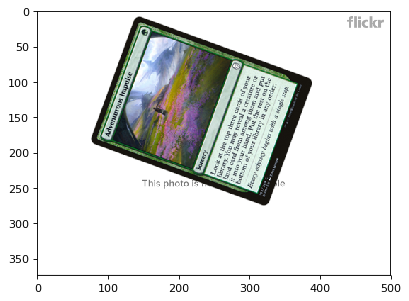

In [43]:
dpi = 80
margin = 0.05 # (5% of the width/height of the figure...)
#xpixels, ypixels = 800, 800

# Make a figure big enough to accomodate an axis of xpixels by ypixels
# as well as the ticklabels, etc...
figsize = (1 + margin) * height / dpi, (1 + margin) * width / dpi

fig = plt.figure(figsize=figsize, dpi=dpi)
# Make the axis the right size...
ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

ax.imshow(composite, interpolation='none')
plt.show()

In [29]:
# Output the annotations csv
# Using file layout from here: https://mxnet.incubator.apache.org/versions/master/api/python/image/image.html
# id header_width object_width object_id, xmin, ymin, xmax, ymax image_path
annotations_csv_path = os.path.join(OUTDIR, 'train.lst')
with open(annotations_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for idx, csv_line in enumerate(csv_lines):
        width = csv_line[0]
        height = csv_line[1]
        bbox = csv_line[2]
        image_path = csv_line[3]
        outrow = [idx, 4, 5, width, height, idx, bbox[0], bbox[1], bbox[2], bbox[3], image_path]
        writer.writerow(outrow)

In [33]:
batch_size = 32 # Number of examples per batch, some examples are 4, pikachu uses 32
data_shape = 256 # Data shape in (channels, height, width) format. For now, only RGB image with 3 channels is supported.
                 # some example had 224, but pikachu example uses 256
data_iter = mx.image.ImageDetIter(batch_size=batch_size, data_shape=(3, data_shape, data_shape),
                                      path_imglist=OUTDIR+'/train.lst', path_root='/')

AG label 
[  4.   5. 500. 375.   0.  58. 170. 368. 462.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0000.png
AG label 
[  4.   5. 500. 441.   1.  31.  37. 341. 349.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0001.png
AG label 
[  4.   5. 500. 323.   2.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0002.png
AG label 
[  4.   5. 500. 323.   3.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0003.png
AG label 
[  4.   5. 500. 374.   4.  18.  12. 340. 356.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0004.png
AG label 
[  4.   5. 500. 333.   5.  50. 191. 326. 443.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0

AG label 
[  4.   5. 500. 375.   0.  58. 170. 368. 462.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0000.png
AG label 
[  4.   5. 500. 441.   1.  31.  37. 341. 349.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0001.png
AG label 
[  4.   5. 500. 323.   2.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0002.png
AG label 
[  4.   5. 500. 323.   3.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0003.png
AG label 
[  4.   5. 500. 374.   4.  18.  12. 340. 356.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0004.png
AG label 
[  4.   5. 500. 333.   5.  50. 191. 326. 443.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0

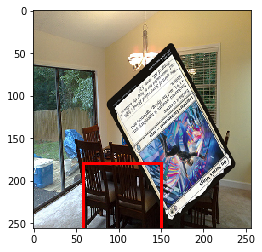

In [61]:
# https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html
data_iter.reset()
batch = data_iter.next()
#print(batch)
#data_shape = 256
img = batch.data[0][0].asnumpy()  # grab the first image, convert to numpy array
img = img.transpose((1, 2, 0))  # we want channel to be the last dimension
#img += np.array([123, 117, 104])
img = img.astype(np.uint8)  # use uint8 (0-255)

# Create figure and axes
fig,ax = plt.subplots(1)
ax.imshow(img)

# draw bounding boxes on image
for label in batch.label[0][0].asnumpy():
    if label[0] < 0:
        print("MISSING LABEL????")
        break
    print(label[1:5])
    #xmin, ymin, xmax, ymax = [int(x * data_shape) for x in label[1:5]]
    #xmin, ymin, xmax, ymax = label[1:5]
    xmin, ymin, xmax, ymax = 58, 179, 150, 279
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=(1, 0, 0), linewidth=3)
    ax.add_patch(rect)

plt.show()

AG label 
[  4.   5. 500. 375.   0.  58. 170. 368. 462.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0000.png
AG label 
[  4.   5. 500. 441.   1.  31.  37. 341. 349.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0001.png
AG label 
[  4.   5. 500. 323.   2.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0002.png
AG label 
[  4.   5. 500. 323.   3.  67. 112. 315. 294.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0003.png
AG label 
[  4.   5. 500. 374.   4.  18.  12. 340. 356.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0004.png
AG label 
[  4.   5. 500. 333.   5.  50. 191. 326. 443.]
<NDArray 9 @cpu(0)> fname /Users/agussman/Documents/DeepLens/deeplens-magiccards/data/generated/image_0

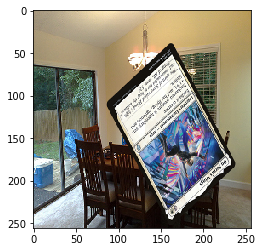

In [46]:
data_iter.reset()
batch = data_iter.next()
data = batch.data[0]
#for i in range(4):
#    plt.subplot(1,4,i+1)
#    plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.imshow(data[0].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.show()

In [54]:
for label in batch.label[0][0].asnumpy():
    print(label)

[  0.  58. 170. 368. 462.]


In [4]:
import time

query = input("Type the name of the set: ")

time.sleep(0.05)
sets = scrython.sets.Sets()

for i in range(sets.data_length()):
    if sets.set_name(i) == query:
        print("Set code:", sets.set_code(i).upper())
        break
    else:
        continue

Type the name of the set: dom


RuntimeError: Cannot run the event loop while another loop is running